<a href="https://colab.research.google.com/github/fannisanurhaffifi/SentimentAnalysisNetflixreviewswithLSTM/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving netflix_reviews.csv to netflix_reviews (1).csv


In [ ]:
# Data processing
import numpy as np
import pandas as pd

# Text processing and NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Download resource NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Deep learning model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Preprocessing & Evaluation
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Misc
import re
import warnings
warnings.filterwarnings("ignore")

# Optional: display for Jupyter
from IPython.display import display

print('Packages successfully imported.')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Packages successfully imported.


In [ ]:
# Mengganti semua nilai null dengan string kosong
df.fillna('', inplace=True)

# Cek total nilai null di seluruh DataFrame
total_null_values = df.isnull().sum().sum()
print(f"Total null values in the DataFrame: {total_null_values}")


Total null values in the DataFrame: 0


In [ ]:
import pandas as pd
from langdetect import detect, DetectorFactory
from collections import Counter

DetectorFactory.seed = 0

df = pd.read_csv('netflix_reviews.csv')


text_column = 'content'

detected_languages = []
for text in df[text_column].dropna():
    try:
        lang = detect(text)
        detected_languages.append(lang)
    except:
        detected_languages.append("error")


language_counts = Counter(detected_languages)


print("Bahasa yang terdeteksi:")
for lang, count in language_counts.items():
    print(f"{lang}: {count} kalimat")


Bahasa yang terdeteksi:
en: 125209 kalimat
id: 457 kalimat
sv: 115 kalimat
af: 1079 kalimat
cy: 128 kalimat
so: 1726 kalimat
no: 364 kalimat
fr: 416 kalimat
tr: 60 kalimat
ro: 575 kalimat
lt: 49 kalimat
tl: 355 kalimat
et: 148 kalimat
error: 453 kalimat
hr: 66 kalimat
hu: 34 kalimat
pl: 206 kalimat
it: 394 kalimat
de: 374 kalimat
es: 165 kalimat
nl: 256 kalimat
fi: 56 kalimat
ca: 337 kalimat
pt: 127 kalimat
sq: 50 kalimat
da: 94 kalimat
sl: 192 kalimat
fa: 19 kalimat
sw: 193 kalimat
sk: 71 kalimat
ar: 52 kalimat
gu: 3 kalimat
vi: 42 kalimat
cs: 103 kalimat
bn: 17 kalimat
hi: 24 kalimat
ta: 11 kalimat
lv: 13 kalimat
ur: 8 kalimat
ko: 7 kalimat
te: 4 kalimat
ja: 2 kalimat
th: 8 kalimat
uk: 1 kalimat
bg: 1 kalimat
zh-cn: 1 kalimat
mr: 10 kalimat
kn: 9 kalimat
ru: 4 kalimat
he: 1 kalimat
ml: 1 kalimat
el: 1 kalimat


In [ ]:
df = pd.read_csv('netflix_reviews.csv')

print("Shape of the dataset:", df.shape)
print("Columns in the dataset:", df.columns)

df.head()

Shape of the dataset: (134096, 8)
Columns in the dataset: Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,aa937339-1203-4a3f-aeb5-3387c0ffcd41,Eric Shaffer,Netflix Household is calling me a liar. Bought...,1,0,8.23.0 build 12 40200,2025-04-17 13:44:46,8.23.0 build 12 40200
1,d989251c-5a41-45a9-8273-8c75016cb7f2,Shayan,Subscriptions in Pakistan are quite affordable...,5,0,9.10.0 build 10 62444,2025-04-17 13:32:59,9.10.0 build 10 62444
2,f6749860-7e6c-4f1c-b801-f20da61aa7d9,Nuvant Gupta,very poor service,1,0,NaN,2025-04-17 13:10:55,NaN
3,dd4d1d35-9a18-4848-a31e-5ef0169eb0f4,Jithu Thomas,bloated. they are just making things up for na...,1,0,8.115.2 build 6 50688,2025-04-17 13:05:16,8.115.2 build 6 50688
4,260e0a4f-4644-4cfa-92c4-bef66cb3b73c,Hasnine Kazami,Netflix is my go-to source for entertainment. ...,5,0,NaN,2025-04-17 12:57:02,NaN


In [ ]:
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # lowercase
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.strip()  # remove leading/trailing whitespace
    return text

df['content_c'] = df['content'].apply(preprocess_text)
df.head(100)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,content_c
0,aa937339-1203-4a3f-aeb5-3387c0ffcd41,Eric Shaffer,Netflix Household is calling me a liar. Bought...,1,0,8.23.0 build 12 40200,2025-04-17 13:44:46,8.23.0 build 12 40200,netflix household is calling me a liar bought ...
1,d989251c-5a41-45a9-8273-8c75016cb7f2,Shayan,Subscriptions in Pakistan are quite affordable...,5,0,9.10.0 build 10 62444,2025-04-17 13:32:59,9.10.0 build 10 62444,subscriptions in pakistan are quite affordable...
2,f6749860-7e6c-4f1c-b801-f20da61aa7d9,Nuvant Gupta,very poor service,1,0,NaN,2025-04-17 13:10:55,NaN,very poor service
3,dd4d1d35-9a18-4848-a31e-5ef0169eb0f4,Jithu Thomas,bloated. they are just making things up for na...,1,0,8.115.2 build 6 50688,2025-04-17 13:05:16,8.115.2 build 6 50688,bloated they are just making things up for nam...
4,260e0a4f-4644-4cfa-92c4-bef66cb3b73c,Hasnine Kazami,Netflix is my go-to source for entertainment. ...,5,0,NaN,2025-04-17 12:57:02,NaN,netflix is my goto source for entertainment th...
...,...,...,...,...,...,...,...,...,...
95,95cb0e9b-49ce-4f27-a27e-bc112dd9c788,Alois Mwasya,The app was amazing not untill they brought up...,1,0,9.10.0 build 10 62444,2025-04-16 09:39:12,9.10.0 build 10 62444,the app was amazing not untill they brought up...
96,0e9a94c2-42cc-41d2-8c9e-0590d25454f6,Edward Burge,this is a joke. I get Netflix through tmobile....,1,0,NaN,2025-04-16 09:20:29,NaN,this is a joke i get netflix through tmobile m...
97,a3588131-2511-4536-98cc-da3993ab1ee0,HARUN RASHID,nice,5,0,9.9.1 build 9 62416,2025-04-16 09:17:23,9.9.1 build 9 62416,nice
98,57ef9610-77b3-43ce-88fc-b46586d750ae,Prasanth Prasanth,very bad,1,0,NaN,2025-04-16 09:08:04,NaN,very bad


In [ ]:
import pandas as pd
import re
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

# Fungsi preprocessing + filter bahasa Inggris
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    try:
        # Deteksi bahasa: hanya terima bahasa Inggris
        if detect(text) != 'en':
            return ""
    except LangDetectException:
        return ""

    # Proses pembersihan teks
    text = text.lower()  # huruf kecil semua
    text = re.sub(r'[^\w\s]', '', text)  # hapus tanda baca
    text = re.sub(r'\d+', '', text)  # hapus angka
    text = text.strip()  # hapus spasi awal/akhir
    return text

# Terapkan ke kolom 'content' → simpan ke kolom 'content_c'
df['content_c'] = df['content'].apply(preprocess_text)

# Lihat hasil 100 baris pertama
df.head(100)


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,content_c
0,aa937339-1203-4a3f-aeb5-3387c0ffcd41,Eric Shaffer,Netflix Household is calling me a liar. Bought...,1,0,8.23.0 build 12 40200,2025-04-17 13:44:46,8.23.0 build 12 40200,netflix household is calling me a liar bought ...
1,d989251c-5a41-45a9-8273-8c75016cb7f2,Shayan,Subscriptions in Pakistan are quite affordable...,5,0,9.10.0 build 10 62444,2025-04-17 13:32:59,9.10.0 build 10 62444,subscriptions in pakistan are quite affordable...
2,f6749860-7e6c-4f1c-b801-f20da61aa7d9,Nuvant Gupta,very poor service,1,0,NaN,2025-04-17 13:10:55,NaN,very poor service
3,dd4d1d35-9a18-4848-a31e-5ef0169eb0f4,Jithu Thomas,bloated. they are just making things up for na...,1,0,8.115.2 build 6 50688,2025-04-17 13:05:16,8.115.2 build 6 50688,bloated they are just making things up for nam...
4,260e0a4f-4644-4cfa-92c4-bef66cb3b73c,Hasnine Kazami,Netflix is my go-to source for entertainment. ...,5,0,NaN,2025-04-17 12:57:02,NaN,netflix is my goto source for entertainment th...
...,...,...,...,...,...,...,...,...,...
95,95cb0e9b-49ce-4f27-a27e-bc112dd9c788,Alois Mwasya,The app was amazing not untill they brought up...,1,0,9.10.0 build 10 62444,2025-04-16 09:39:12,9.10.0 build 10 62444,the app was amazing not untill they brought up...
96,0e9a94c2-42cc-41d2-8c9e-0590d25454f6,Edward Burge,this is a joke. I get Netflix through tmobile....,1,0,NaN,2025-04-16 09:20:29,NaN,this is a joke i get netflix through tmobile m...
97,a3588131-2511-4536-98cc-da3993ab1ee0,HARUN RASHID,nice,5,0,9.9.1 build 9 62416,2025-04-16 09:17:23,9.9.1 build 9 62416,
98,57ef9610-77b3-43ce-88fc-b46586d750ae,Prasanth Prasanth,very bad,1,0,NaN,2025-04-16 09:08:04,NaN,


In [ ]:
df = df[['content_c', 'score', 'reviewId']]
df.head()

,content_c,score,reviewId
0,netflix household is calling me a liar bought ...,1,aa937339-1203-4a3f-aeb5-3387c0ffcd41
1,subscriptions in pakistan are quite affordable...,5,d989251c-5a41-45a9-8273-8c75016cb7f2
2,very poor service,1,f6749860-7e6c-4f1c-b801-f20da61aa7d9
3,bloated they are just making things up for nam...,1,dd4d1d35-9a18-4848-a31e-5ef0169eb0f4
4,netflix is my goto source for entertainment th...,5,260e0a4f-4644-4cfa-92c4-bef66cb3b73c


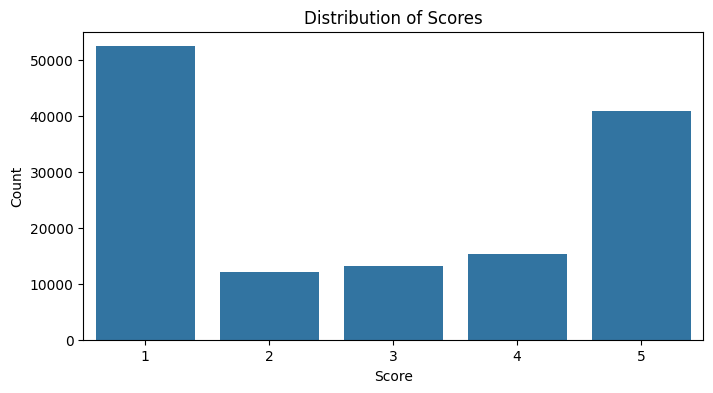

In [ ]:
# analyzing score distribution
score_counts = df.score.value_counts().sort_index()
plt.figure(figsize=(8, 4))
sns.barplot(x=score_counts.index, y=score_counts.values)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()

In [ ]:
# Inisialisasi SentimentIntensityAnalyzer dari NLTK
sia = SentimentIntensityAnalyzer()

# Fungsi untuk mengklasifikasikan sentimen berdasarkan skor compound
def classify_sentiment(text):
    score = sia.polarity_scores(text)
    compound = score['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Terapkan fungsi klasifikasi sentimen ke kolom 'content_c'
df['sentiment'] = df['content_c'].apply(classify_sentiment)

# Tampilkan hasil dengan kolom sentimen
display(df[['content_c', 'sentiment']].head())


,content_c,sentiment
0,netflix household is calling me a liar bought ...,positive
1,subscriptions in pakistan are quite affordable...,positive
2,very poor service,negative
3,bloated they are just making things up for nam...,neutral
4,netflix is my goto source for entertainment th...,positive


In [ ]:
print(df.columns)


Index(['content_c', 'score', 'reviewId', 'sentiment'], dtype='object')


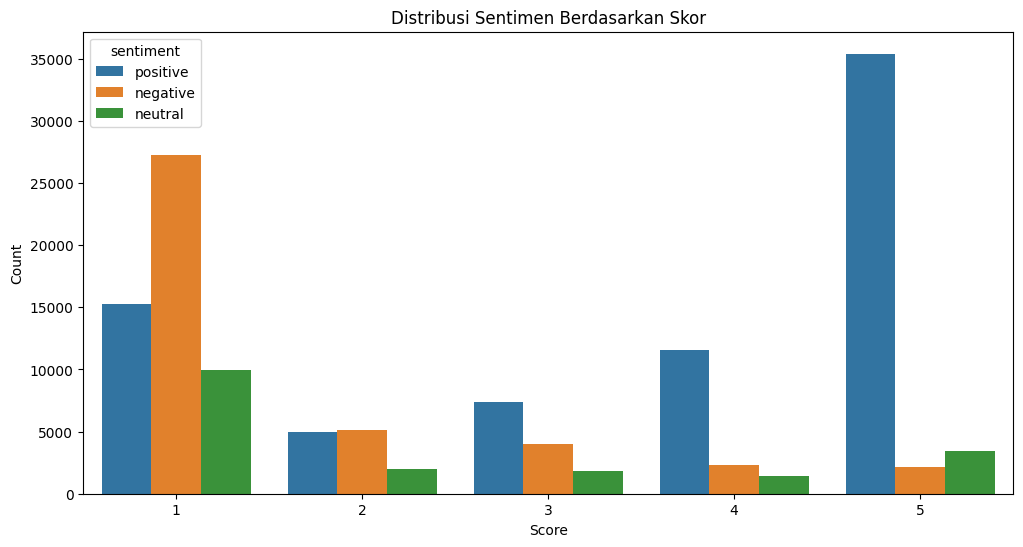

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='score', hue='sentiment')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribusi Sentimen Berdasarkan Skor')
plt.show()


In [ ]:
# Label encoding
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])
num_classes = len(label_encoder.classes_)

# One-hot encoding label
labels = to_categorical(df['sentiment_encoded'], num_classes=num_classes)

# --- Bagian 3: Tokenisasi dan Padding ---
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['content_c'])

sequences = tokenizer.texts_to_sequences(df['content_c'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# --- Bagian 4: Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences,
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels  # Jaga distribusi label
)

# --- Bagian 5: Membangun Model LSTM ---
embedding_dim = 128
lstm_units = 64

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2),
    Dense(units=num_classes, activation='softmax')
])

# Build model secara eksplisit agar model.summary() menampilkan info lengkap
model.build(input_shape=(None, max_len))

# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# --- Bagian 6: Ringkasan Model ---
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,329,603 (5.07 MB)

 Trainable params: 1,329,603 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# --- Bagian 7: Testing Model ---
history = model.fit(
    X_test, y_test,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


Epoch 1/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 62s 183ms/step - accuracy: 0.9341 - loss: 0.2065 - val_accuracy: 0.8598 - val_loss: 0.4397
Epoch 2/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 82s 184ms/step - accuracy: 0.9376 - loss: 0.2013 - val_accuracy: 0.8533 - val_loss: 0.4450
Epoch 3/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 82s 186ms/step - accuracy: 0.9483 - loss: 0.1675 - val_accuracy: 0.8619 - val_loss: 0.4574
Epoch 4/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 83s 188ms/step - accuracy: 0.9505 - loss: 0.1568 - val_accuracy: 0.8652 - val_loss: 0.4580
Epoch 5/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 82s 187ms/step - accuracy: 0.9574 - loss: 0.1400 - val_accuracy: 0.8633 - val_loss: 0.4900
Epoch 6/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 83s 189ms/step - accuracy: 0.9591 - loss: 0.1286 - val_accuracy: 0.8620 - val_loss: 0.5208
Epoch 7/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 82s 191ms/step - accuracy: 0.9627 - loss: 0.1181 - val_accuracy: 0.8620 - val_loss: 0.5085
Epoch 8/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 83s 194ms/step - accuracy: 0.9652 - loss: 0


Test Accuracy on test data: 0.9679


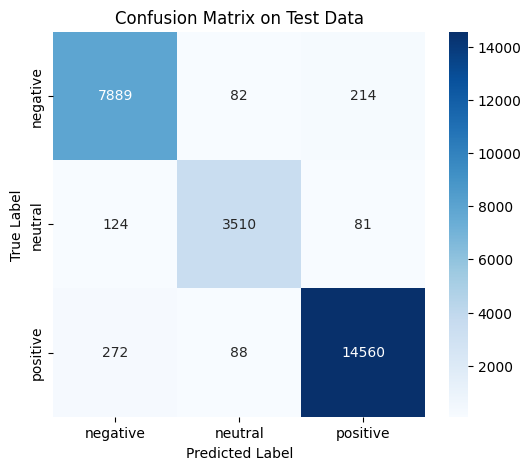


Classification Report on Test Data:
              precision    recall  f1-score   support

    negative       0.95      0.96      0.96      8185
     neutral       0.95      0.94      0.95      3715
    positive       0.98      0.98      0.98     14920

    accuracy                           0.97     26820
   macro avg       0.96      0.96      0.96     26820
weighted avg       0.97      0.97      0.97     26820



In [ ]:


# Evaluasi akurasi pada data test
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'\nTest Accuracy on test data: {accuracy:.4f}')

# Prediksi pada data test
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix pada data test
cm = confusion_matrix(y_true, y_pred)
labels = label_encoder.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Data')  # Judul diubah ke "Test Data"
plt.show()

# Laporan klasifikasi untuk data test
print("\nClassification Report on Test Data:")
print(classification_report(y_true, y_pred, target_names=labels))
